In [185]:
import warnings
warnings.simplefilter(action='ignore',category=RuntimeWarning)
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
import os
import seaborn as sn
import matplotlib.pyplot as plt 
import sys
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import tensorflow as tf
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from yellowbrick.model_selection import RFECV
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report


# SVM

# Data exploratory analysis

In [20]:
df_train = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\svm\SalaryData_Train(1).csv")

In [21]:
df_test = pd.read_csv(r"C:\Users\Adith\Desktop\Data Science_Excel R\home assignments\svm\SalaryData_Test(1).csv")

In [22]:
df_train.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [23]:
df_test.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [24]:
#merging our train and test data 
df = df_train.append(df_test)
df.reset_index(inplace=True,drop=True)
df

C:\Users\Adith\AppData\Local\Temp\ipykernel_3760\1959253221.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_train.append(df_test)


age          workclass   education  educationno        maritalstatus  \
0       39          State-gov   Bachelors           13        Never-married   
1       50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2       38            Private     HS-grad            9             Divorced   
3       53            Private        11th            7   Married-civ-spouse   
4       28            Private   Bachelors           13   Married-civ-spouse   
...    ...                ...         ...          ...                  ...   
45216   33            Private   Bachelors           13        Never-married   
45217   39            Private   Bachelors           13             Divorced   
45218   38            Private   Bachelors           13   Married-civ-spouse   
45219   44            Private   Bachelors           13             Divorced   
45220   35       Self-emp-inc   Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0            Adm-clerical   Not-in-family                White     Male   
1         Exec-managerial         Husband                White     Male   
2       Handlers-cleaners   Not-in-family                White     Male   
3       Handlers-cleaners         Husband                Black     Male   
4          Prof-specialty            Wife                Black   Female   
...                   ...             ...                  ...      ...   
45216      Prof-specialty       Own-child                White     Male   
45217      Prof-specialty   Not-in-family                White   Female   
45218      Prof-specialty         Husband                White     Male   
45219        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
45220     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0             2174            0            40   United-States   <=50K  
1                0            0            13   United-States   <=50K  
2                0            0            40   United-States   <=50K  
3                0            0            40   United-States   <=50K  
4                0            0            40            Cuba   <=50K  
...            ...          ...           ...             ...     ...  
45216            0            0            40   United-States   <=50K  
45217            0            0            36   United-States   <=50K  
45218            0            0            50   United-States   <=50K  
45219         5455            0            40   United-States   <=50K  
45220            0            0            60   United-States    >50K  

[45221 rows x 14 columns]

In [25]:
#checking the shape of our data
df.shape

(45221, 14)

In [26]:
#checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [27]:
#checking with descriptive statistics 
df.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  45221.000000  45221.000000  45221.000000  45221.000000  45221.000000
mean      38.548086     10.118463   1101.454700     88.548617     40.938038
std       13.217981      2.552909   7506.511295    404.838249     12.007640
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000

In [28]:
#checking for any null values 
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [29]:
#checking duplicate data
df[df.duplicated()]

age workclass      education  educationno        maritalstatus  \
326     33   Private      Bachelors           13   Married-civ-spouse   
364     27   Private      Bachelors           13        Never-married   
518     24   Private        HS-grad            9        Never-married   
525     24   Private        HS-grad            9        Never-married   
619     33   Private      Bachelors           13   Married-civ-spouse   
...    ...       ...            ...          ...                  ...   
45205   22   Private   Some-college           10        Never-married   
45210   32   Private        HS-grad            9   Married-civ-spouse   
45213   31   Private        HS-grad            9   Married-civ-spouse   
45214   25   Private        HS-grad            9        Never-married   
45218   38   Private      Bachelors           13   Married-civ-spouse   

               occupation    relationship    race      sex  capitalgain  \
326       Exec-managerial         Husband   White     Male            0   
364          Craft-repair   Not-in-family   White     Male            0   
518     Handlers-cleaners       Unmarried   Black   Female            0   
525          Craft-repair       Own-child   White     Male            0   
619       Exec-managerial         Husband   White     Male            0   
...                   ...             ...     ...      ...          ...   
45205        Craft-repair       Own-child   White     Male            0   
45210   Handlers-cleaners         Husband   White     Male            0   
45213        Craft-repair         Husband   White     Male            0   
45214       Other-service       Own-child   White   Female            0   
45218      Prof-specialty         Husband   White     Male            0   

       capitalloss  hoursperweek          native  Salary  
326              0            40   United-States    >50K  
364              0            50   United-States   <=50K  
518              0            40   United-States   <=50K  
525              0            40   United-States   <=50K  
619              0            40   United-States    >50K  
...            ...           ...             ...     ...  
45205            0            40   United-States   <=50K  
45210            0            40   United-States   <=50K  
45213            0            40   United-States   <=50K  
45214            0            40   United-States   <=50K  
45218            0            50   United-States   <=50K  

[5982 rows x 14 columns]

In [30]:
#checking shape of duplicate data
df[df.duplicated()].shape

(5982, 14)

In [31]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45216    False
45217    False
45218     True
45219    False
45220    False
Length: 45221, dtype: bool

In [32]:
#dropping our duplicate values
df = df.drop_duplicates()

In [33]:
df.shape

(39239, 14)

In [34]:
df.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [35]:
#setting label encoder for all categorical values 
df1 = df.copy()
cols = ['workclass','education','maritalstatus','occupation','relationship',
      'race','sex','native','Salary']
df1[cols] = df[cols].apply(LabelEncoder().fit_transform)

df1.head()


age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

# Visualizations

age


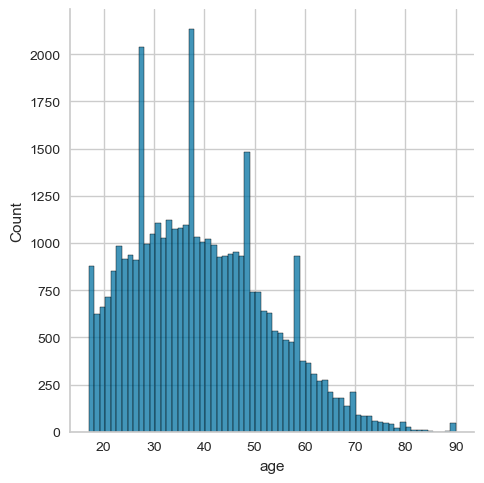

<Figure size 2000x1000 with 0 Axes>

workclass


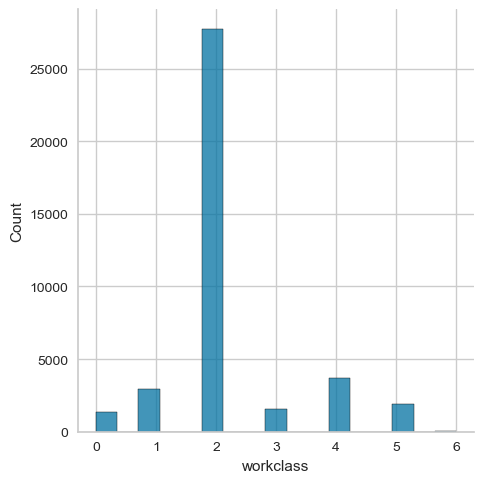

<Figure size 2000x1000 with 0 Axes>

education


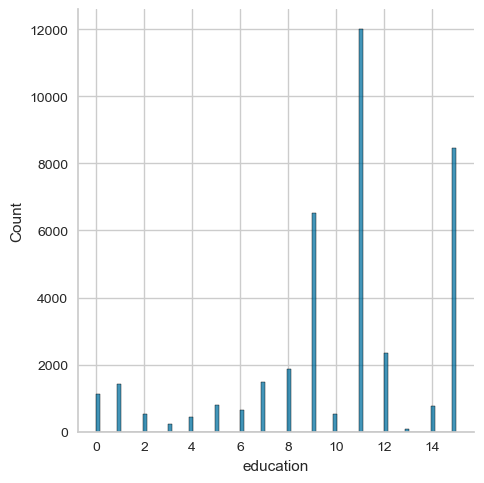

<Figure size 2000x1000 with 0 Axes>

educationno


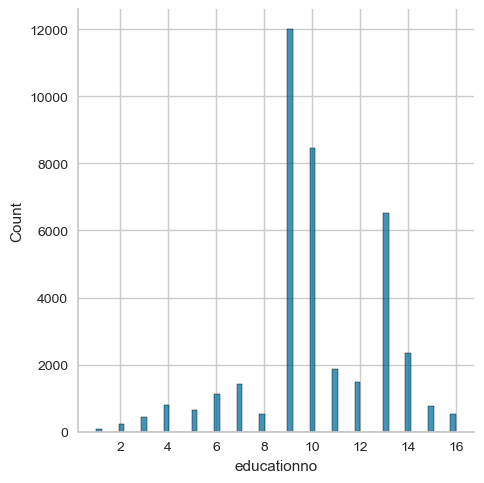

<Figure size 2000x1000 with 0 Axes>

maritalstatus


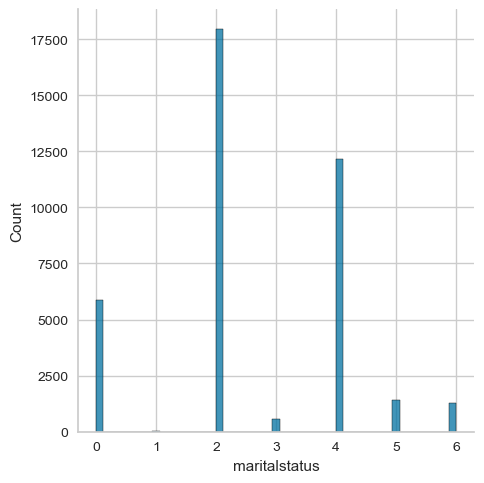

<Figure size 2000x1000 with 0 Axes>

occupation


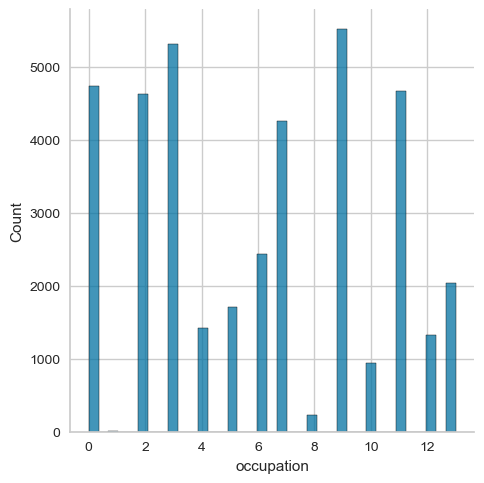

<Figure size 2000x1000 with 0 Axes>

relationship


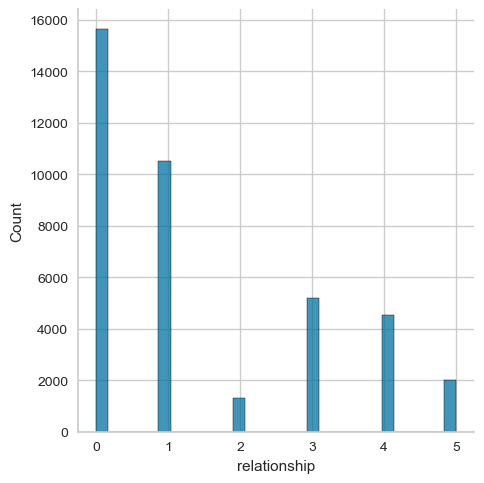

<Figure size 2000x1000 with 0 Axes>

race


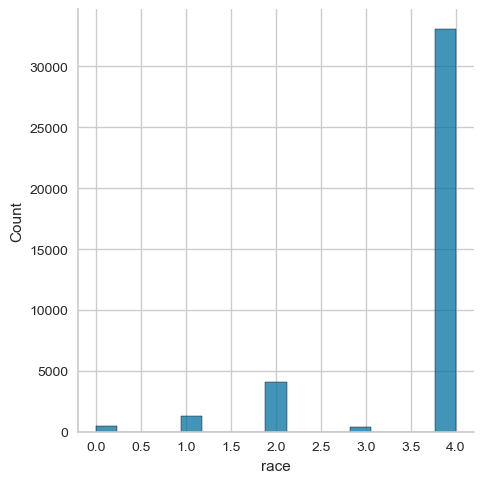

<Figure size 2000x1000 with 0 Axes>

sex


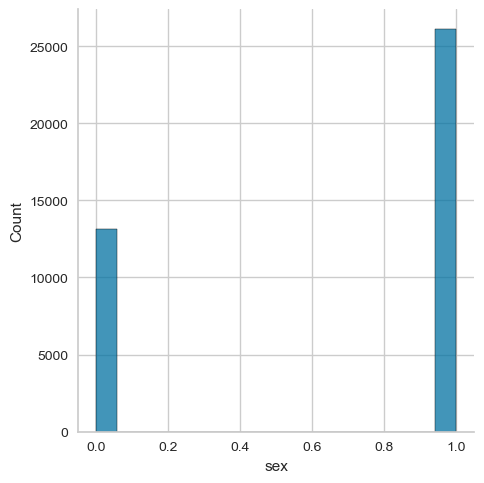

<Figure size 2000x1000 with 0 Axes>

capitalgain


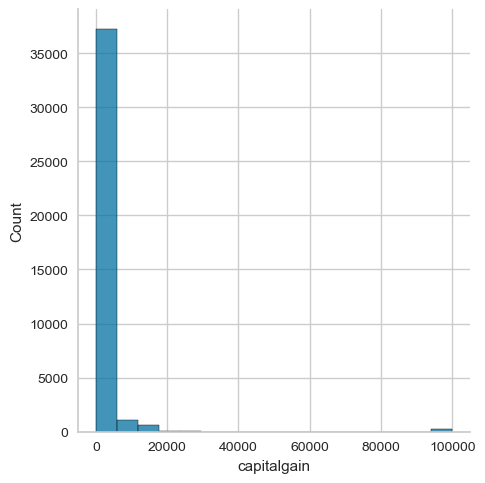

<Figure size 2000x1000 with 0 Axes>

capitalloss


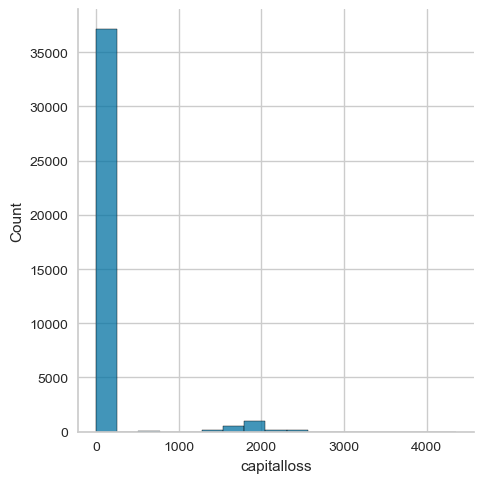

<Figure size 2000x1000 with 0 Axes>

hoursperweek


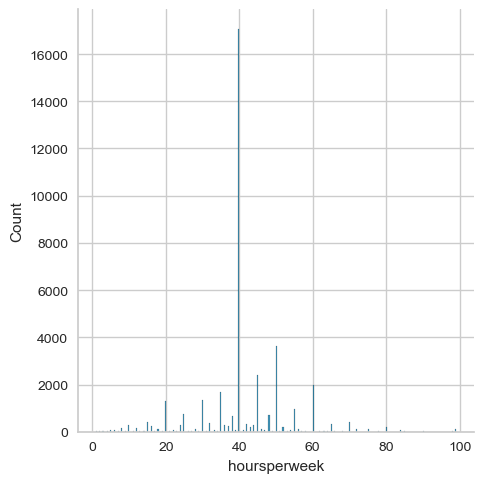

<Figure size 2000x1000 with 0 Axes>

native


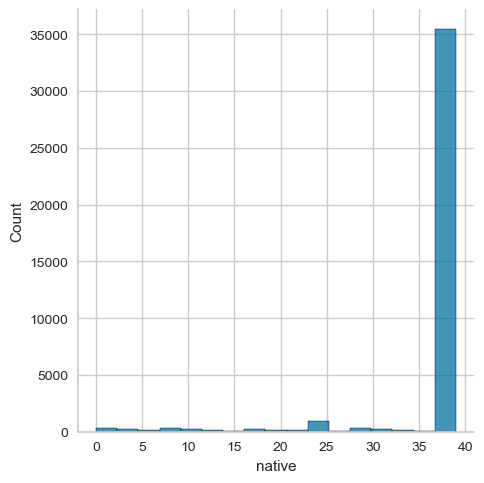

<Figure size 2000x1000 with 0 Axes>

Salary


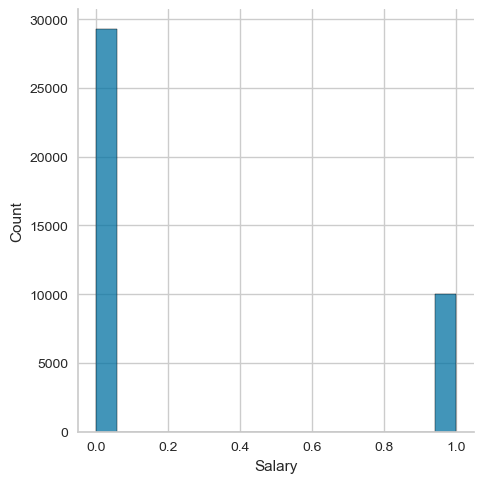

<Figure size 2000x1000 with 0 Axes>

In [36]:
#checking the skewness and analysing distribution of data
for n in df1.columns:
    print(n)
    sn.displot(df1[n])
    plt.figure(figsize=(20,10))
    plt.show()

<AxesSubplot:>

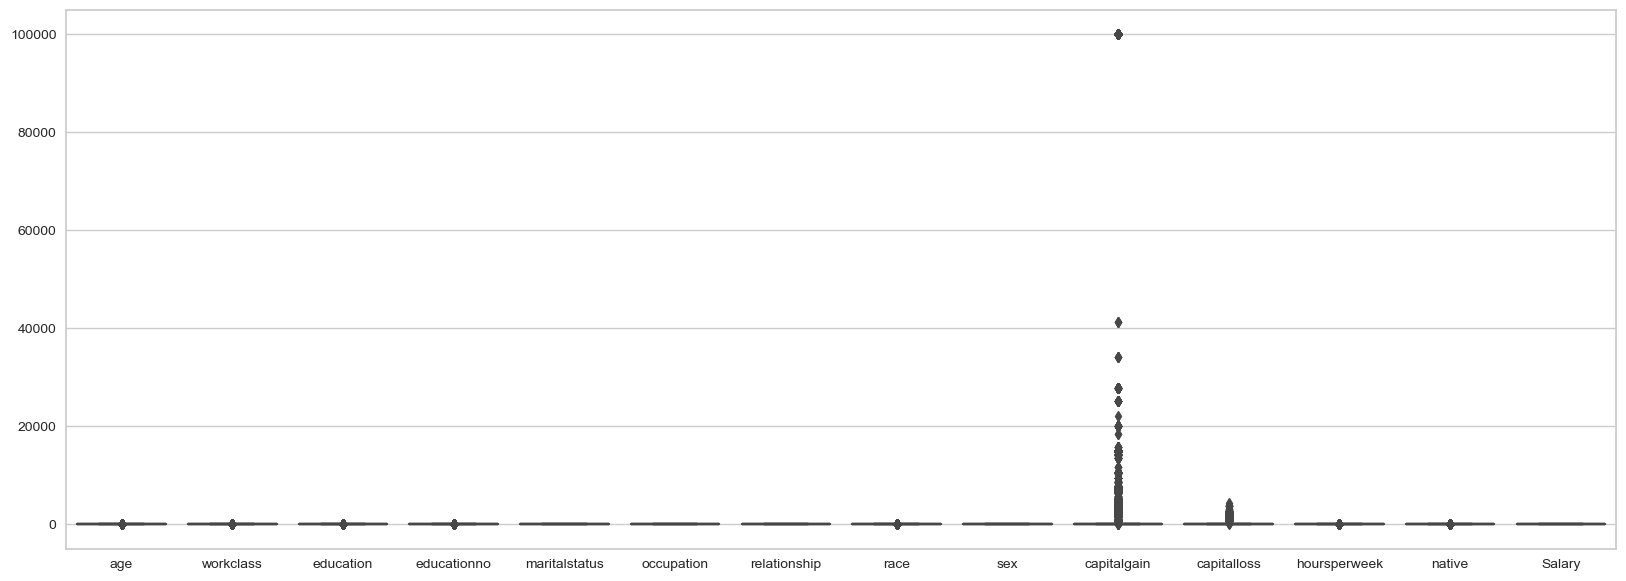

In [37]:
#checking for any outliers 
plt.figure(figsize=(20,7))
sn.boxplot(data = df1)

In [38]:
#checking correlation of features 
df1.corr()

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.079642   0.001807     0.030211      -0.233279   
workclass      0.079642   1.000000   0.022333     0.041859      -0.031786   
education      0.001807   0.022333   1.000000     0.366443      -0.043411   
educationno    0.030211   0.041859   0.366443     1.000000      -0.069475   
maritalstatus -0.233279  -0.031786  -0.043411    -0.069475       1.000000   
occupation    -0.004676   0.016217  -0.020636     0.087334       0.006666   
relationship  -0.230643  -0.070247  -0.010764    -0.085939       0.155762   
race           0.044616   0.059339   0.003913     0.033594      -0.075430   
sex            0.068483   0.075331  -0.029864     0.006596      -0.109154   
capitalgain    0.075495   0.031985   0.035072     0.129552      -0.042309   
capitalloss    0.049876   0.002649   0.024082     0.082594      -0.033607   
hoursperweek   0.066927   0.047542   0.060431     0.136030      -0.167011   
native         0.012129   0.010469   0.075014     0.097527      -0.026461   
Salary         0.214285   0.015598   0.094952     0.329569      -0.181626   

               occupation  relationship      race       sex  capitalgain  \
age             -0.004676     -0.230643  0.044616  0.068483     0.075495   
workclass        0.016217     -0.070247  0.059339  0.075331     0.031985   
education       -0.020636     -0.010764  0.003913 -0.029864     0.035072   
educationno      0.087334     -0.085939  0.033594  0.006596     0.129552   
maritalstatus    0.006666      0.155762 -0.075430 -0.109154    -0.042309   
occupation       1.000000     -0.061367  0.008746  0.061054     0.016952   
relationship    -0.061367      1.000000 -0.113604 -0.584810    -0.062712   
race             0.008746     -0.113604  1.000000  0.085235     0.021099   
sex              0.061054     -0.584810  0.085235  1.000000     0.052882   
capitalgain      0.016952     -0.062712  0.021099  0.052882     1.000000   
capitalloss      0.010978     -0.066390  0.031794  0.053687    -0.036791   
hoursperweek     0.020983     -0.247737  0.053968  0.226747     0.082977   
native           0.004230     -0.001036  0.116142 -0.010639     0.012924   
Salary           0.049738     -0.244911  0.078779  0.212912     0.231529   

               capitalloss  hoursperweek    native    Salary  
age               0.049876      0.066927  0.012129  0.214285  
workclass         0.002649      0.047542  0.010469  0.015598  
education         0.024082      0.060431  0.075014  0.094952  
educationno       0.082594      0.136030  0.097527  0.329569  
maritalstatus    -0.033607     -0.167011 -0.026461 -0.181626  
occupation        0.010978      0.020983  0.004230  0.049738  
relationship     -0.066390     -0.247737 -0.001036 -0.244911  
race              0.031794      0.053968  0.116142  0.078779  
sex               0.053687      0.226747 -0.010639  0.212912  
capitalgain      -0.036791      0.082977  0.012924  0.231529  
capitalloss       1.000000      0.050638  0.014576  0.153263  
hoursperweek      0.050638      1.000000  0.013993  0.221424  
native            0.014576      0.013993  1.000000  0.025050  
Salary            0.153263      0.221424  0.025050  1.000000

<AxesSubplot:>

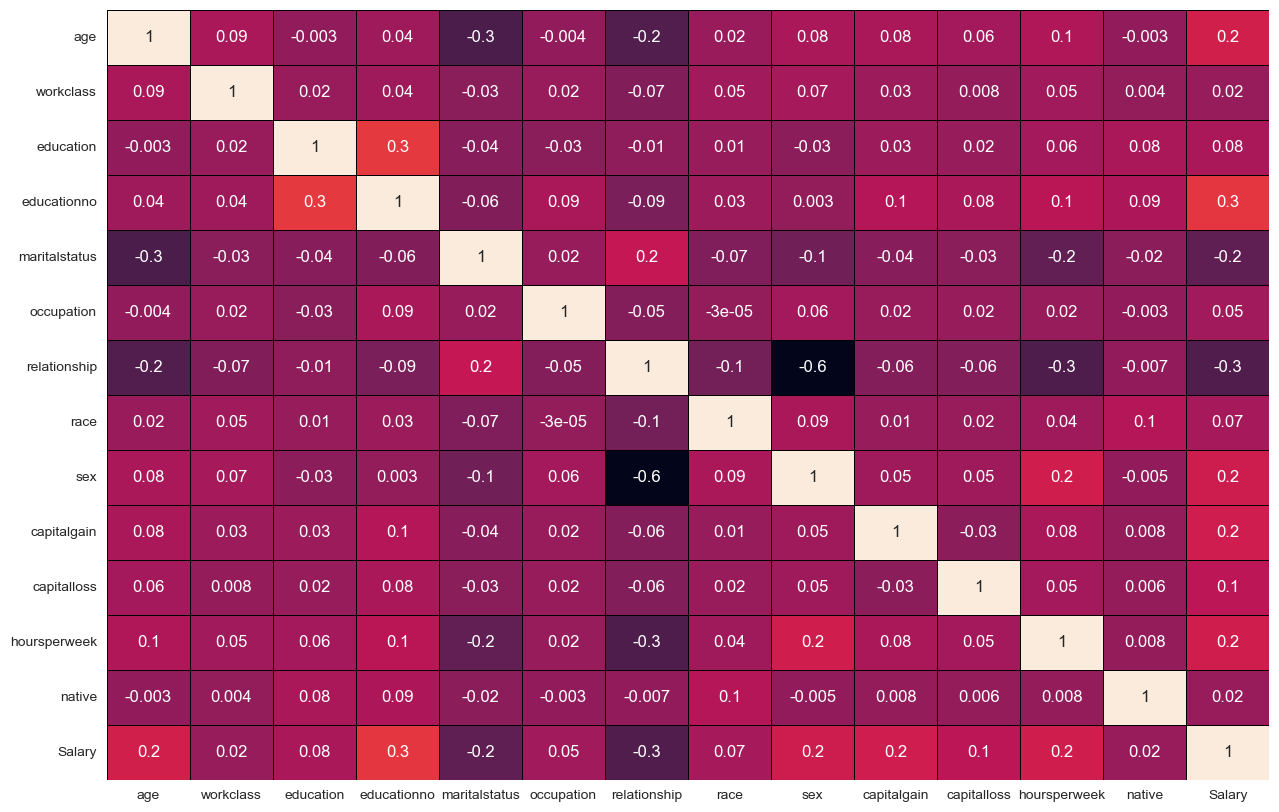

In [36]:
#*Pearson's Correlation Coefficient*: helps you find out the relationship between two quantities
fig,ax = plt.subplots(figsize = (15,10))
sn.heatmap(df1.corr(),annot=True,fmt='.1g',cbar=False,linewidths='0.5',linecolor='black')

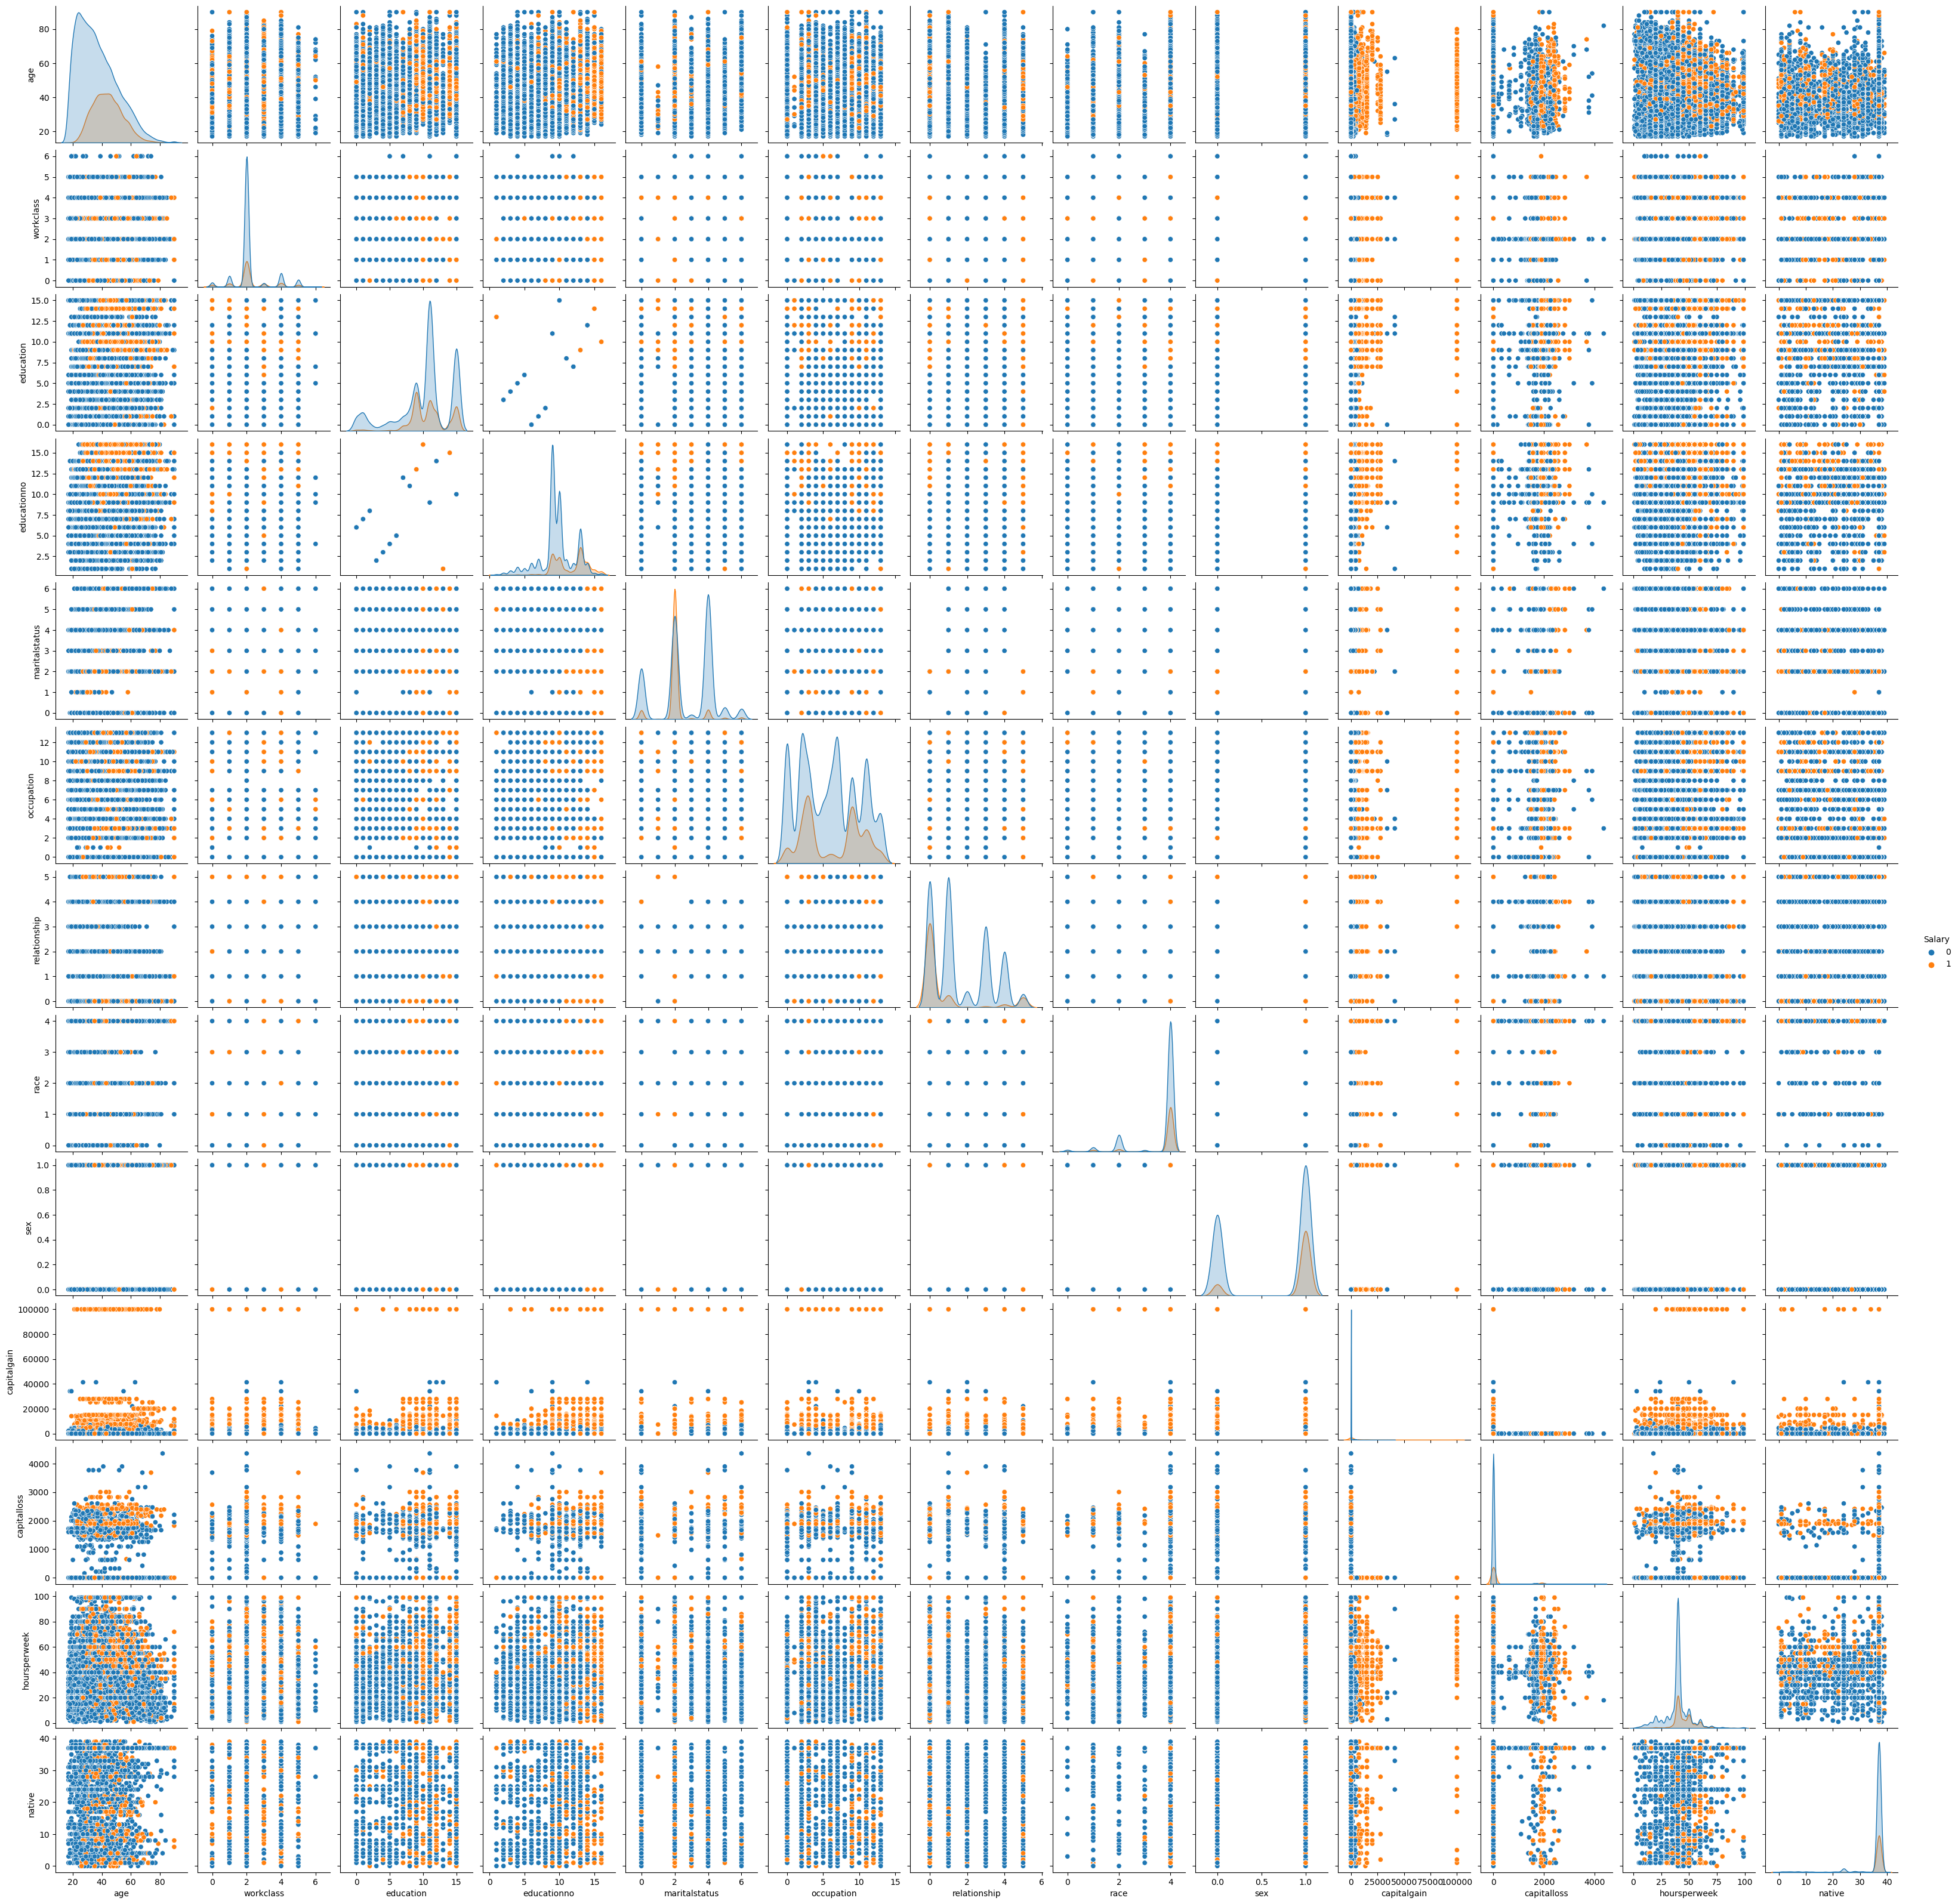

In [23]:
sn.pairplot(data=df1,hue = 'Salary')

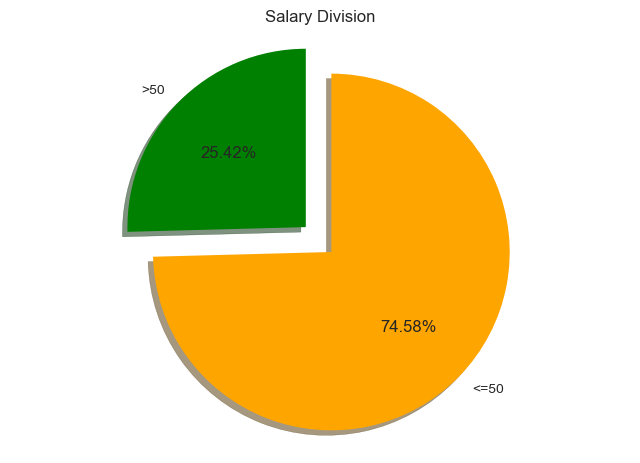

In [190]:
#checking the balance of salary by pie chart <=50 = 0 and >50 = 1
labels =['>50','<=50']
colors =['green','orange']
sizes = [9975,29264]
plt.pie(sizes,labels=labels,colors=colors,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('Salary Division')
plt.axis('equal')
plt.show()

In [42]:
df1.Salary.value_counts()

0    29264
1     9975
Name: Salary, dtype: int64

In [43]:
# since we can say our depedent varaible has imbalance we need to balance the data

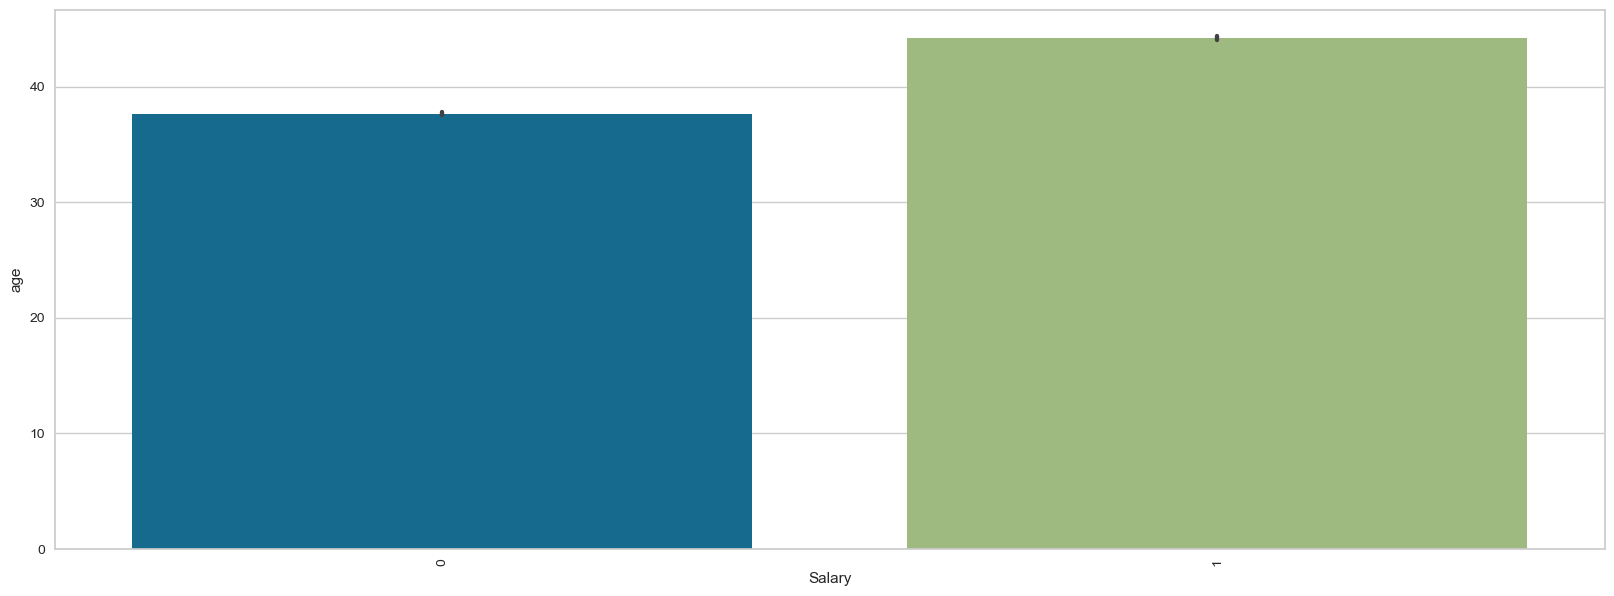

In [44]:
# plotting a barplot to check relation of age and salary
#<= 50 = 0 and  >50 =1
plt.figure(figsize=(20,7))
Age = df1[['Salary','age']].sort_values('age',ascending=False)
ax = sn.barplot(x = 'Salary',y = 'age',data = Age)
ax.set(xlabel = 'Salary',ylabel = 'age')
plt.xticks(rotation = 90)
plt.show()

In [41]:
## with intuition we can say approximately people age <=35 earn less than 50K

In [45]:
#checking of counts of education qualification
df.education.value_counts()

 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64

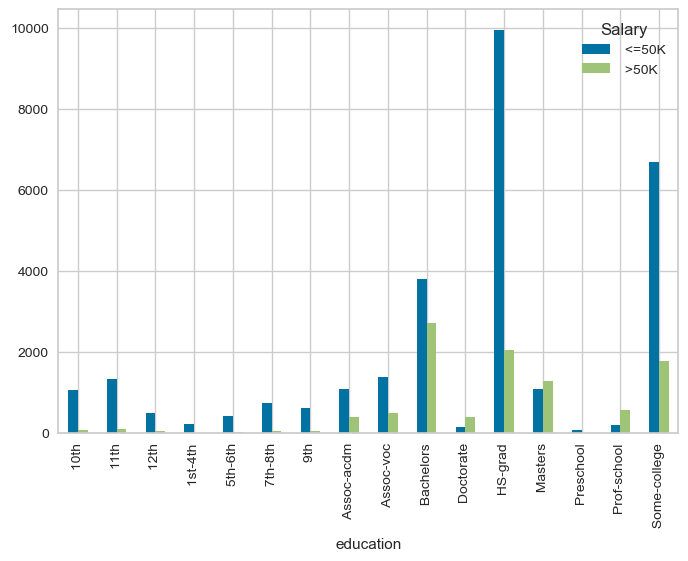

In [46]:
#plotting salary vs different education levels 
pd.crosstab(df.education,df.Salary).plot(kind = 'bar')
plt.show()

In [47]:
## as we can see the preschool have the lowest salary,
##while with masters,doctorate and prof-school are having salary >50 ##

In [48]:
#plotting salary with gender 
df.sex.value_counts()

 Male      26097
 Female    13142
Name: sex, dtype: int64

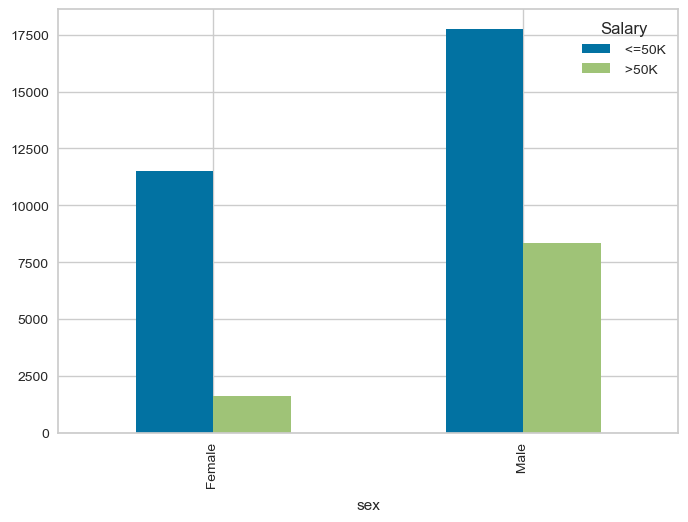

In [49]:
 pd.crosstab(df.sex,df.Salary).plot(kind = 'bar')
plt.show()

In [46]:
## compared to female the male salary is more regardless of conditions with salary ##

In [50]:
df.educationno.value_counts()

9     12003
10     8456
13     6522
14     2357
11     1859
12     1470
7      1422
6      1136
4       801
15      764
5       658
8       540
16      526
3       438
2       217
1        70
Name: educationno, dtype: int64

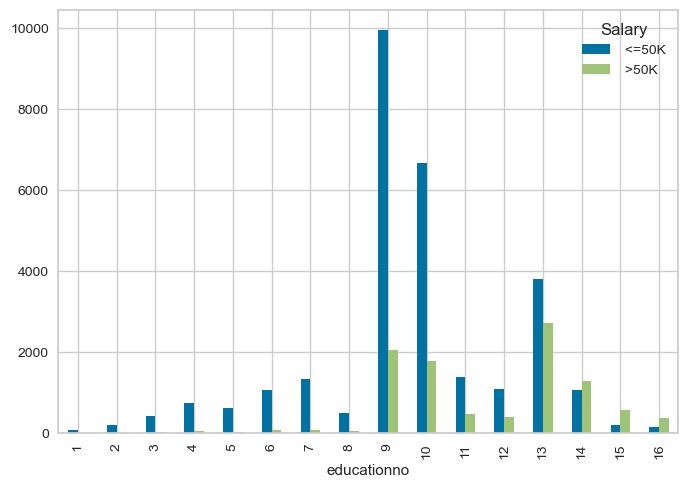

In [51]:
 pd.crosstab(df.educationno,df.Salary).plot(kind = 'bar')
plt.show()

In [49]:
## its very evidently visible that low number of educationno have salary less than <50 and 
#higher the number higher the salary##

# EDA 

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalgain'>

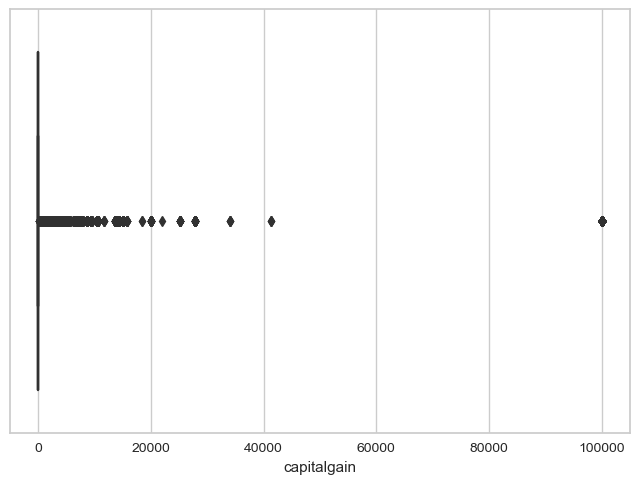

In [52]:
#checking outliers and treating for capital gain
sn.boxplot(df1['capitalgain'])

In [53]:
#finding our upper and lower limit 
ul = df1['capitalgain'].quantile(0.99)
ll = df1['capitalgain'].quantile(0.01)

print(ul,ll)

15024.0 0.0


In [54]:
#trimming
df2 = df1[(df1['capitalgain']<=15024)&(df1['capitalgain']>0)]

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalgain'>

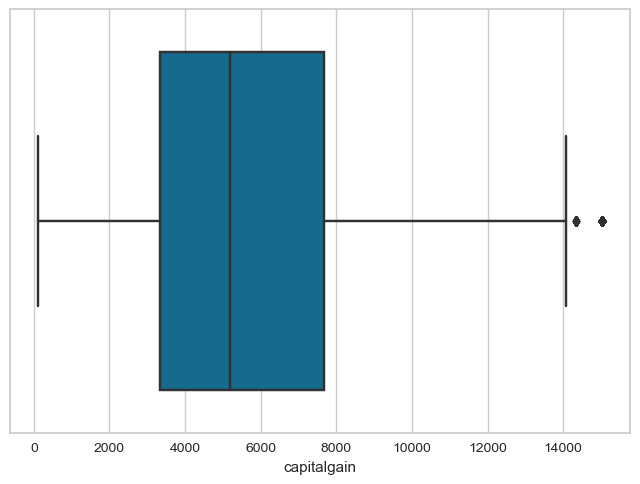

In [55]:
#plotting after trimming the outlier
sn.boxplot(df2['capitalgain'])

In [56]:
#apply capping or winsorization
df1['capitalgain'] = np.where(df1['capitalgain']>= ul,
                             ul,
                             np.where(df1['capitalgain']<=ll,
                                     ll,
                                     df1['capitalgain']))

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalgain'>

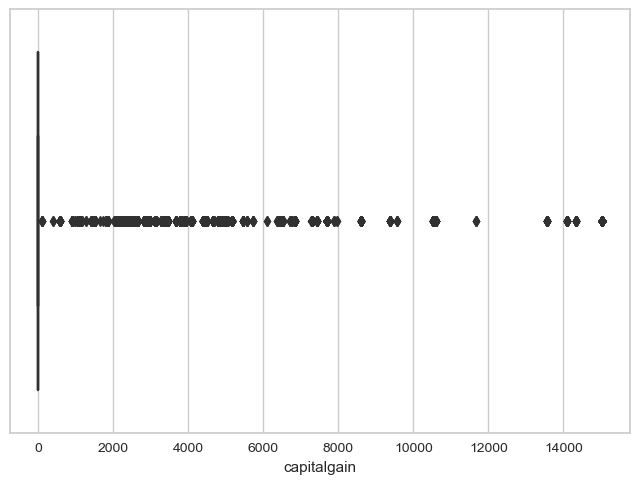

In [57]:
sn.boxplot(df1['capitalgain'])

<AxesSubplot:>

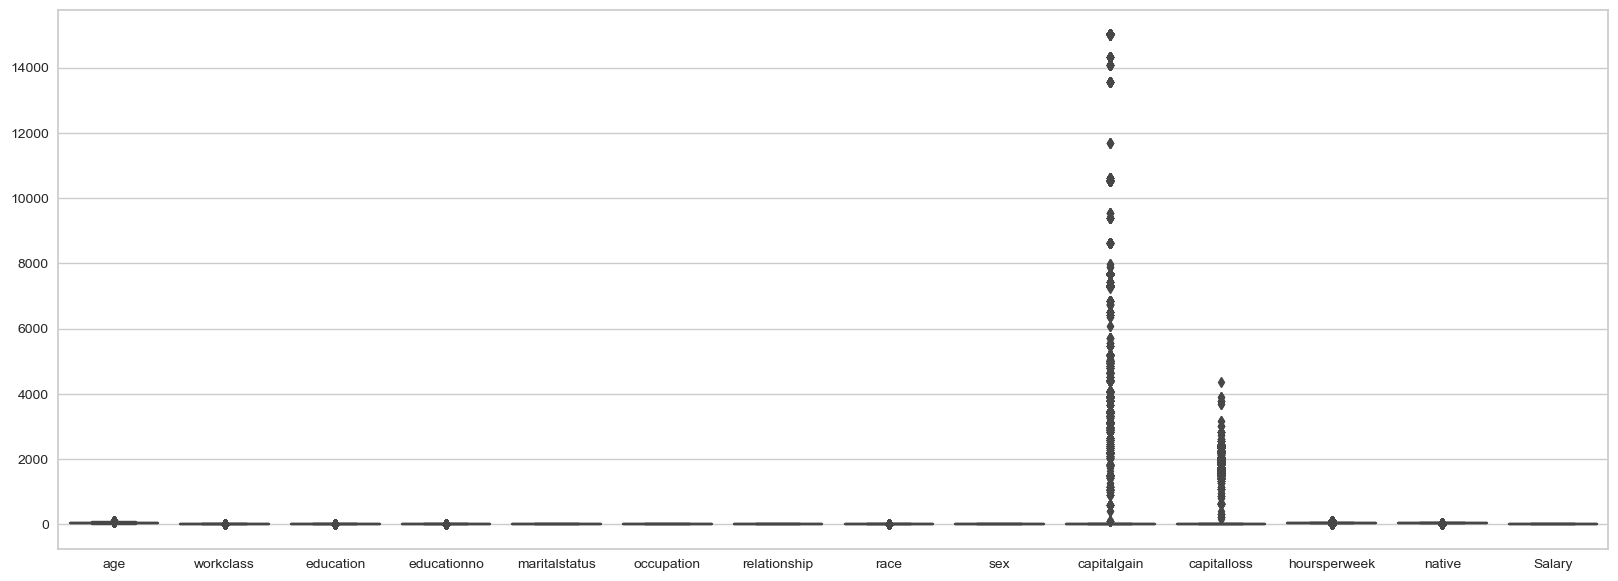

In [58]:
#checking for any outliers 
plt.figure(figsize=(20,7))
sn.boxplot(data = df1)

In [54]:
## as the distance form outliers are minimal we have treated outlier well for capital gain ##


C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capitalloss'>

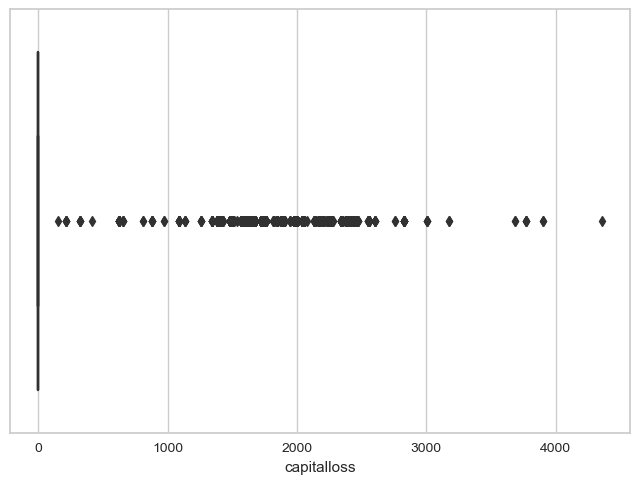

In [59]:
#checking outlier distance for capital loss 
sn.boxplot(df1['capitalloss'])

In [56]:
## as we can see the distance between points are less and might be a unique value, hence we leave without treating ##

# Feature Engineering

In [60]:
df1.shape

(39239, 14)

In [61]:
#splitting our data into independent and dependent variables 
X = df1.iloc[:,0:13]
y = df1.iloc[:,13]

In [62]:
#standardizing values 
std = StandardScaler()
df_scaled = std.fit_transform(X)
df_scaled

array([[-0.02326754,  2.74336382, -0.31240583, ..., -0.23465538,
        -0.09681487,  0.28415699],
       [ 0.80392517,  1.75342578, -0.31240583, ..., -0.23465538,
        -2.26409357,  0.28415699],
       [-0.09846688, -0.22645031,  0.2027651 , ..., -0.23465538,
        -0.09681487,  0.28415699],
       ...,
       [-0.02326754, -0.22645031, -0.31240583, ..., -0.23465538,
        -0.41789319,  0.28415699],
       [ 0.35272914, -0.22645031, -0.31240583, ..., -0.23465538,
        -0.09681487,  0.28415699],
       [-0.32406489,  0.76348773, -0.31240583, ..., -0.23465538,
         1.50857677,  0.28415699]])

In [63]:
#storing our standardized values on X
X = df_scaled

In [64]:
#splitting our varaibles into train and test split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# Recursive Elimination Method using SVM

In [65]:
svc_lin=SVC(kernel='linear')
svm_rfe_model=RFE(estimator=svc_lin)
svm_rfe_model_fit=svm_rfe_model.fit(X_train,y_train)

In [66]:
svm_rfe_model_fit.n_features_

6

In [67]:
svm_rfe_model_fit.ranking_

array([1, 4, 5, 1, 3, 8, 2, 6, 1, 1, 1, 1, 7])

In [68]:
svm_rfe_model_fit.support_

array([ True, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False])

In [69]:
df1.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1       2174.0            0            40      37   
1             0     4    1          0.0            0            13      37   
2             1     4    1          0.0            0            40      37   
3             0     2    1          0.0            0            40      37   
4             5     2    0          0.0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [70]:
#checking for columns required 
for i,col in zip(range(X.shape[1]),X):
    print(f"{col} selected = {svm_rfe_model_fit.support_[i]} rank = {svm_rfe_model_fit.ranking_[i]}")

[-0.02326754  2.74336382 -0.31240583  1.08589165  0.93061066 -1.51156384
 -0.27908769  0.41127027  0.70963567  0.5359279  -0.23465538 -0.09681487
  0.28415699] selected = True rank = 1
[ 0.80392517  1.75342578 -0.31240583  1.08589165 -0.36968602 -0.76524742
 -0.89713171  0.41127027  0.70963567 -0.27141929 -0.23465538 -2.26409357
  0.28415699] selected = False rank = 4
[-0.09846688 -0.22645031  0.2027651  -0.43087196 -1.66998271 -0.26770314
 -0.27908769  0.41127027  0.70963567 -0.27141929 -0.23465538 -0.09681487
  0.28415699] selected = False rank = 5
[ 1.02952318 -0.22645031 -2.37308953 -1.18925376 -0.36968602 -0.26770314
 -0.89713171 -1.86679778  0.70963567 -0.27141929 -0.23465538 -0.09681487
  0.28415699] selected = True rank = 1
[-0.85046025 -0.22645031 -0.31240583  1.08589165 -0.36968602  0.72738542
  2.19308838 -1.86679778 -1.4091738  -0.27141929 -0.23465538 -0.09681487
 -4.93389867] selected = False rank = 3
[-0.17366622 -0.22645031  0.46035056  1.46508256 -0.36968602 -0.76524742

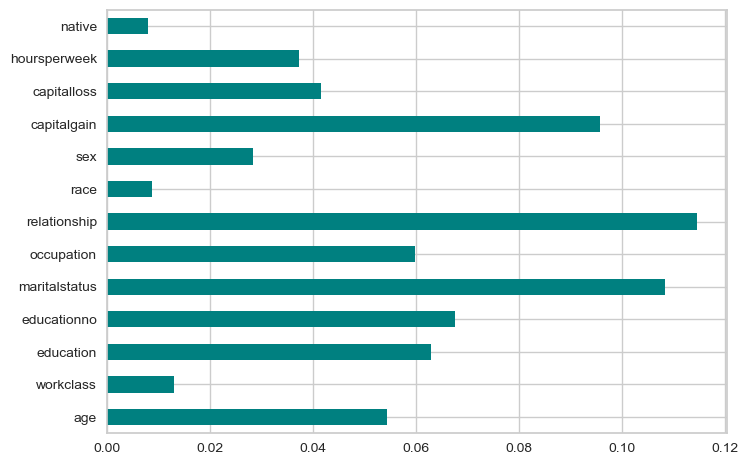

In [71]:
#checking through importance plot for selection of coloumns
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,df1.columns[0:len(df1.columns)-1])
feat_importances.plot(kind = 'barh',color ='teal')
plt.show()

In [72]:
df2 = df1[["age","education","maritalstatus","relationship","capitalgain","occupation","Salary"]]

In [73]:
df2.head()

age  education  maritalstatus  relationship  capitalgain  occupation  \
0   39          9              4             1       2174.0           0   
1   50          9              2             0          0.0           3   
2   38         11              0             1          0.0           5   
3   53          1              2             0          0.0           5   
4   28          9              2             5          0.0           9   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [74]:
#splitting again our data once again 
array = df2.values
X1 = array[:,0:6]
y1 = array [:,6]

In [75]:
X1,y1 = make_classification(n_samples=20000,n_features=7,n_informative=5,n_redundant=2,
                          n_repeated=0,n_classes=2,n_clusters_per_class=1,random_state=0 )

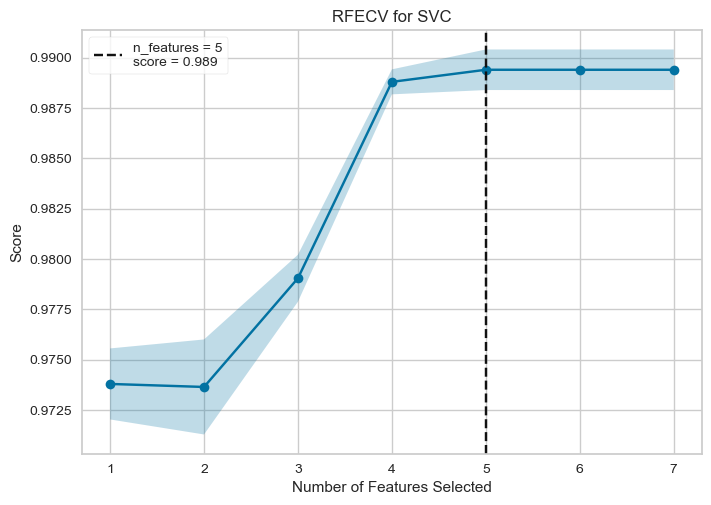

<AxesSubplot:title={'center':'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [76]:
visualizer = RFECV(SVC(kernel='linear',C=1))
visualizer.fit(X1,y1,)
visualizer.show()

In [90]:
## since our score is good we go ahead with selected features for svm classification##

# smote technique  for imbalanced data

In [77]:
df2.head()

age  education  maritalstatus  relationship  capitalgain  occupation  \
0   39          9              4             1       2174.0           0   
1   50          9              2             0          0.0           3   
2   38         11              0             1          0.0           5   
3   53          1              2             0          0.0           5   
4   28          9              2             5          0.0           9   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

C:\Users\Adith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

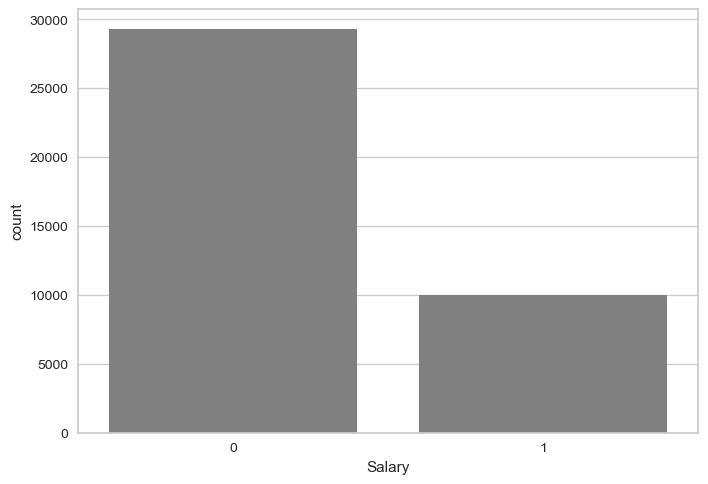

In [78]:
#visualizing the balance of data by a countplot
sn.countplot(df2['Salary'],color='grey')

In [79]:
#splitting our values gain into train and test 
X2 = df2.iloc[:,0:6]
y2 = df2.iloc[:,6]

In [80]:
#splitting into train and test split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.20)

In [81]:
#checking our balance of data after train test split
print('Training Features Shape:', X2_train.shape)
print('Training Labels Shape:', X2_test.shape)
print('Testing Features Shape:', y2_train.shape)
print('Testing Labels Shape:', y2_test.shape)

Training Features Shape: (31391, 6)
Training Labels Shape: (7848, 6)
Testing Features Shape: (31391,)
Testing Labels Shape: (7848,)


In [82]:
#fitting variables into smote tomek
smk = SMOTETomek(n_jobs=-1,sampling_strategy='minority')
X2_res,y2_res = smk.fit_resample(X2_train,y2_train)


C:\Users\Adith\anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [83]:
print(X2_res.shape,y2_res.shape)

(46638, 6) (46638,)


In [84]:
#checking with our original and new dataset
print('original dataset shape {}'.format(Counter(y2)))
print('resamples dataset shape {}'.format(Counter(y2_res)))

original dataset shape Counter({0: 29264, 1: 9975})
resamples dataset shape Counter({1: 23319, 0: 23319})


# using Randomized search cv for best parameters 

In [96]:
#standardizing values 
std = StandardScaler()
df_scaled2 = std.fit_transform(X2_res)
df_scaled2

array([[-0.54078871,  0.17073113, -0.29164613, -0.73665493, -0.35600681,
        -1.03890444],
       [ 1.29654386,  0.17073113, -0.29164613, -0.73665493, -0.35600681,
        -1.03890444],
       [ 0.01839946, -0.10956169, -0.29164613,  2.31787337, -0.35600681,
        -0.78873573],
       ...,
       [-0.14136859, -0.3898545 , -0.29164613, -0.73665493,  3.7455594 ,
        -0.78873573],
       [ 0.49770361,  0.45102394, -0.29164613,  2.31787337, -0.35600681,
         0.71227652],
       [ 1.69596399, -0.67014732, -0.29164613, -0.73665493, -0.35600681,
        -0.78873573]])

In [99]:
#storing our new values 
X2_res = df_scaled2

In [101]:
#splitting our new values into train and test
X2_res_train,X2_res_test,y2_res_train,y2_res_test = train_test_split(X2_res,y2_res,test_size=0.4)

In [102]:
#checking our balance of data after train test split
print('Training Features Shape:', X2_res_train.shape)
print('Training Labels Shape:', X2_res_test.shape)
print('Testing Features Shape:', y2_res_train.shape)
print('Testing Labels Shape:', y2_res_test.shape)

Training Features Shape: (27982, 6)
Training Labels Shape: (18656, 6)
Testing Features Shape: (27982,)
Testing Labels Shape: (18656,)


In [103]:
clf = SVC()

In [104]:
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]

In [105]:
rsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=100,n_jobs=1)

In [106]:
rsv.fit(X2_res_train,y2_res_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.0001, gamma=0.01, kernel=rbf..........................
[CV 1/10; 1/10] END C=0.0001, gamma=0.01, kernel=rbf;, score=0.503 total time=  48.0s
[CV 2/10; 1/10] START C=0.0001, gamma=0.01, kernel=rbf..........................
[CV 2/10; 1/10] END C=0.0001, gamma=0.01, kernel=rbf;, score=0.503 total time=  44.5s
[CV 3/10; 1/10] START C=0.0001, gamma=0.01, kernel=rbf..........................
[CV 3/10; 1/10] END C=0.0001, gamma=0.01, kernel=rbf;, score=0.503 total time=  50.3s
[CV 4/10; 1/10] START C=0.0001, gamma=0.01, kernel=rbf..........................
[CV 4/10; 1/10] END C=0.0001, gamma=0.01, kernel=rbf;, score=0.503 total time=  45.4s
[CV 5/10; 1/10] START C=0.0001, gamma=0.01, kernel=rbf..........................
[CV 5/10; 1/10] END C=0.0001, gamma=0.01, kernel=rbf;, score=0.503 total time=  50.0s
[CV 6/10; 1/10] START C=0.0001, gamma=0.01, kernel=rbf..........................
[CV 6/10; 1/10] END C

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=1,
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=100)

In [110]:
#locating our best parameters and best score for svm 
rsv.best_params_,rsv.best_score_

({'kernel': 'rbf', 'gamma': 0.1, 'C': 10}, 0.8058387415499408)

# Fitting our final svm classifier

In [111]:
clf2 = SVC(kernel='rbf',C=10,gamma=0.1)
clf2.fit(X2_res_train,y2_res_train)

SVC(C=10, gamma=0.1)

In [113]:
y_pred = clf2.predict(X2_res_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [160]:
#confusion matrix 
print(confusion_matrix(y2_res_test,y_pred))

[[6798 2443]
 [1125 8290]]


In [159]:
#classification report 
print(classification_report(y2_res_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      9241
           1       0.77      0.88      0.82      9415

    accuracy                           0.81     18656
   macro avg       0.82      0.81      0.81     18656
weighted avg       0.81      0.81      0.81     18656



# conclusions

# 1) svm are sensitive to outliers , so outliers can be treated well with quantile and winsorization method , at exceptional cases svm can also handle outliers well, so we can ignore  outliers if our accuracy is not affected.

# 2) svm are slow towards larger datasets when compared to smaller, to make it efficiency better we have to perform eda and feature engineering and also dimensional rdeuction 

# 3) svm can lead to overfitting so we need to use hyperparameter tuning ,to get a fit model  with low bias and low variance 

# 4) svm have time complexity and higher the dimensions can lead to run complexity of kernel